## Create a classifier to predict the wine color from wine quality attributes using this dataset: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

## The data is in the database we've been using
+ host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com'
+ database='training'
+ port=5432
+ user='dot_student'
+ password='qgis'
+ table name = 'winequality'

## Query for the data and create a numpy array

In [1]:
import pg8000

In [2]:
con = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com',database='training',port=5432,user='dot_student',password='qgis')

In [6]:
cursor = con.cursor()

In [14]:
cursor.execute('SELECT * FROM winequality')

In [15]:
data = []
for item in cursor.fetchall():
    data.append(item)

In [16]:
data

[[Decimal('7'),
  Decimal('0.27'),
  Decimal('0.36'),
  Decimal('20.7'),
  Decimal('0.045'),
  Decimal('45'),
  Decimal('170'),
  Decimal('1.001'),
  Decimal('3'),
  Decimal('0.45'),
  Decimal('8.8'),
  'W'],
 [Decimal('6.3'),
  Decimal('0.3'),
  Decimal('0.34'),
  Decimal('1.6'),
  Decimal('0.049'),
  Decimal('14'),
  Decimal('132'),
  Decimal('0.994'),
  Decimal('3.3'),
  Decimal('0.49'),
  Decimal('9.5'),
  'W'],
 [Decimal('8.1'),
  Decimal('0.28'),
  Decimal('0.4'),
  Decimal('6.9'),
  Decimal('0.05'),
  Decimal('30'),
  Decimal('97'),
  Decimal('0.9951'),
  Decimal('3.26'),
  Decimal('0.44'),
  Decimal('10.1'),
  'W'],
 [Decimal('7.2'),
  Decimal('0.23'),
  Decimal('0.32'),
  Decimal('8.5'),
  Decimal('0.058'),
  Decimal('47'),
  Decimal('186'),
  Decimal('0.9956'),
  Decimal('3.19'),
  Decimal('0.4'),
  Decimal('9.9'),
  'W'],
 [Decimal('7.2'),
  Decimal('0.23'),
  Decimal('0.32'),
  Decimal('8.5'),
  Decimal('0.058'),
  Decimal('47'),
  Decimal('186'),
  Decimal('0.9956'),
  Dec

In [17]:
from numpy import array

In [20]:
myarray = array(data)

In [37]:
import pandas as pd

In [38]:
df = pd.read_sql('SELECT * FROM winequality',con)

In [39]:
wine = df.as_matrix()

In [40]:
wine

array([[7.0, 0.27, 0.36, ..., 0.45, 8.8, 'W'],
       [6.3, 0.3, 0.34, ..., 0.49, 9.5, 'W'],
       [8.1, 0.28, 0.4, ..., 0.44, 10.1, 'W'],
       ..., 
       [6.3, 0.51, 0.13, ..., 0.75, 11.0, 'R'],
       [5.9, 0.645, 0.12, ..., 0.71, 10.2, 'R'],
       [6.0, 0.31, 0.47, ..., 0.66, 11.0, 'R']], dtype=object)

In [41]:
x = wine[:,:-1]
y = wine[:,-1]

In [42]:
x

array([[7.0, 0.27, 0.36, ..., 3.0, 0.45, 8.8],
       [6.3, 0.3, 0.34, ..., 3.3, 0.49, 9.5],
       [8.1, 0.28, 0.4, ..., 3.26, 0.44, 10.1],
       ..., 
       [6.3, 0.51, 0.13, ..., 3.42, 0.75, 11.0],
       [5.9, 0.645, 0.12, ..., 3.57, 0.71, 10.2],
       [6.0, 0.31, 0.47, ..., 3.39, 0.66, 11.0]], dtype=object)

In [43]:
y

array(['W', 'W', 'W', ..., 'R', 'R', 'R'], dtype=object)

## Split the data into features (x) and target (y, the last column in the table)

### Remember you can cast the results into an numpy array and then slice out what you want

In [27]:
x = myarray[:,:11]
y = myarray[:,11:]
y2 = myarray[:,11]

In [26]:
y

array([['W'],
       ['W'],
       ['W'],
       ..., 
       ['R'],
       ['R'],
       ['R']], dtype=object)

In [28]:
y2

array(['W', 'W', 'W', ..., 'R', 'R', 'R'], dtype=object)

## Create a decision tree with the data

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()

In [32]:
dt = dt.fit(x,y)

## Run 10-fold cross validation on the model

In [33]:
from sklearn.cross_validation import cross_val_score

In [35]:
scores = cross_val_score(dt,x,y2,cv=10)

In [36]:
scores

array([ 0.97846154,  0.98307692,  0.97384615,  0.97846154,  0.98923077,
        0.98      ,  0.97538462,  0.97538462,  0.98305085,  0.97376543])

## If you have time, calculate the feature importance and graph based on the code in the [slides from last class](http://ledeprogram.github.io/algorithms/class9/#21)

### Use [this tip for getting the column names from your cursor object](http://stackoverflow.com/questions/10252247/how-do-i-get-a-list-of-column-names-from-a-psycopg2-cursor)

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

(0, 1)

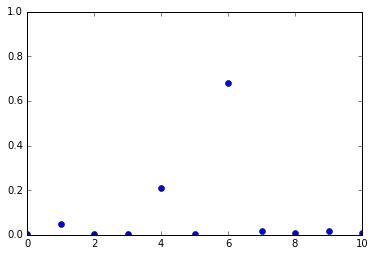

In [45]:
plt.plot(dt.feature_importances_,'o')
plt.ylim(0,1)

In [46]:
import numpy as np

In [52]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,color
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,W
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,W
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,W
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,W
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,W
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,W
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,W
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,W
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,W
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,W


In [53]:
np.asarray(df['residual_sugar'])

array([ 20.7,   1.6,   6.9, ...,   2.3,   2. ,   3.6])

In [51]:
df.columns = 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'color'

In [54]:
df.as_matrix()

array([[7.0, 0.27, 0.36, ..., 0.45, 8.8, 'W'],
       [6.3, 0.3, 0.34, ..., 0.49, 9.5, 'W'],
       [8.1, 0.28, 0.4, ..., 0.44, 10.1, 'W'],
       ..., 
       [6.3, 0.51, 0.13, ..., 0.75, 11.0, 'R'],
       [5.9, 0.645, 0.12, ..., 0.71, 10.2, 'R'],
       [6.0, 0.31, 0.47, ..., 0.66, 11.0, 'R']], dtype=object)